# Analyzing historical returns.

In [1]:
import pandas_datareader.data as reader
import matplotlib.pyplot as plt
import seaborn as sns

## Obtaining real-time cryptocurrency price data online.

Fetches 4 years of historical cryptocurrency prices and stores them in a DataFrame.

In [2]:
import datetime as dt
import yfinance as yf

end = dt.datetime.now()
start = end - dt.timedelta(days=4 * 365)
kryptolist = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD']
df = yf.download(kryptolist, start=start, end=end)['Adj Close']


[*********************100%%**********************]  4 of 4 completed


In [3]:
df

,BTC-USD,ETH-USD,LTC-USD,XRP-USD
Date,,,,
2019-10-18,7973.207520,173.621338,53.491692,0.295005
2019-10-19,7988.560547,172.913025,54.034573,0.293022
2019-10-20,8222.078125,175.534378,54.934380,0.294179
2019-10-21,8243.720703,174.920990,54.938297,0.292979
2019-10-22,8078.203125,172.300858,53.744362,0.291607
...,...,...,...,...
2023-10-13,26862.375000,1552.089478,61.574059,0.485699
2023-10-14,26861.707031,1555.256836,61.665157,0.486775
2023-10-15,27159.652344,1558.069824,61.656433,0.487846


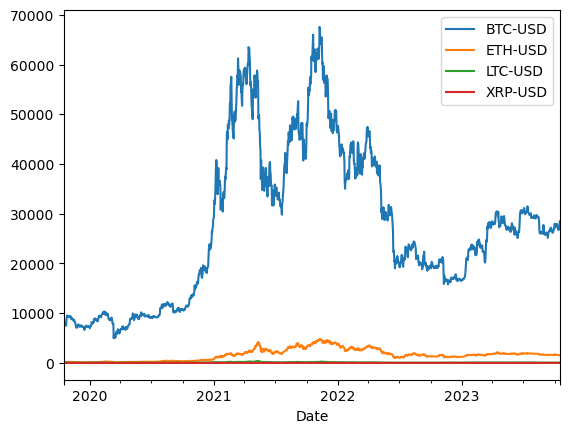

In [4]:
df.plot()
plt.show()

When comparing cryptocurrencies, it's essential to focus on their returns rather than their absolute prices.


Calculating daily returns by taking the percentage change and removing rows with missing data (NaN)

In [5]:
daily_returns = df.pct_change().dropna(axis=0)
daily_returns

,BTC-USD,ETH-USD,LTC-USD,XRP-USD
Date,,,,
2019-10-19,0.001926,-0.004080,0.010149,-0.006722
2019-10-20,0.029231,0.015160,0.016652,0.003948
2019-10-21,0.002632,-0.003494,0.000071,-0.004079
2019-10-22,-0.020078,-0.014979,-0.021732,-0.004683
2019-10-23,-0.069759,-0.057446,-0.076592,-0.059889
...,...,...,...,...
2023-10-13,0.003946,0.008104,0.007300,0.005484
2023-10-14,-0.000025,0.002041,0.001479,0.002215
2023-10-15,0.011092,0.001809,-0.000141,0.002200


To make cryptocurrencies comparable, we need to accumulate (sum) these daily returns over time.

In [6]:
daily_cum_returns = (daily_returns + 1).cumprod() - 1
daily_cum_returns

,BTC-USD,ETH-USD,LTC-USD,XRP-USD
Date,,,,
2019-10-19,0.001926,-0.004080,0.010149,-0.006722
2019-10-20,0.031213,0.011018,0.026970,-0.002800
2019-10-21,0.033928,0.007486,0.027044,-0.006868
2019-10-22,0.013169,-0.007606,0.004724,-0.011518
2019-10-23,-0.057510,-0.064615,-0.072231,-0.070717
...,...,...,...,...
2023-10-13,2.369080,7.939509,0.151096,0.646409
2023-10-14,2.368996,7.957752,0.152799,0.650057
2023-10-15,2.406365,7.973954,0.152636,0.653687


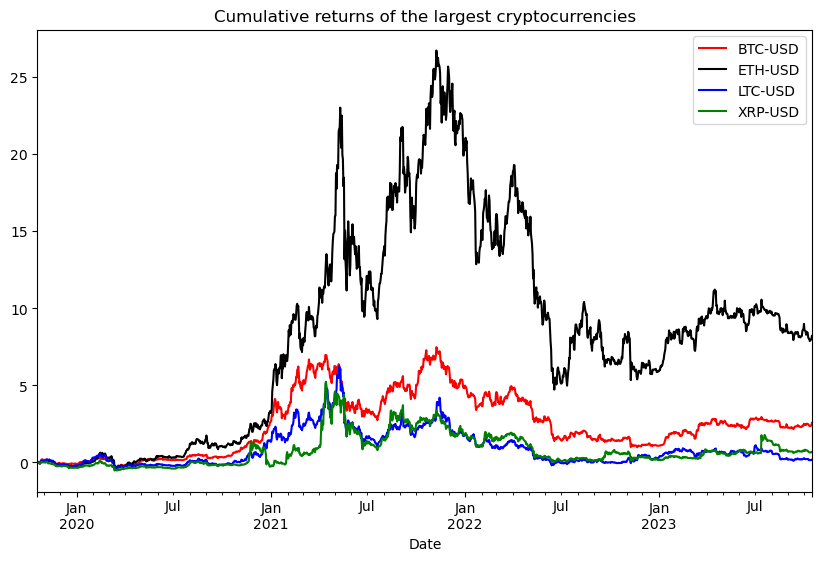

In [7]:
colors = ['r', 'k', 'b', 'g']
daily_cum_returns.plot(color=colors, figsize=(10,6))
plt.title('Cumulative returns of the largest cryptocurrencies')
plt.show()

### Price charts over the last 4 years

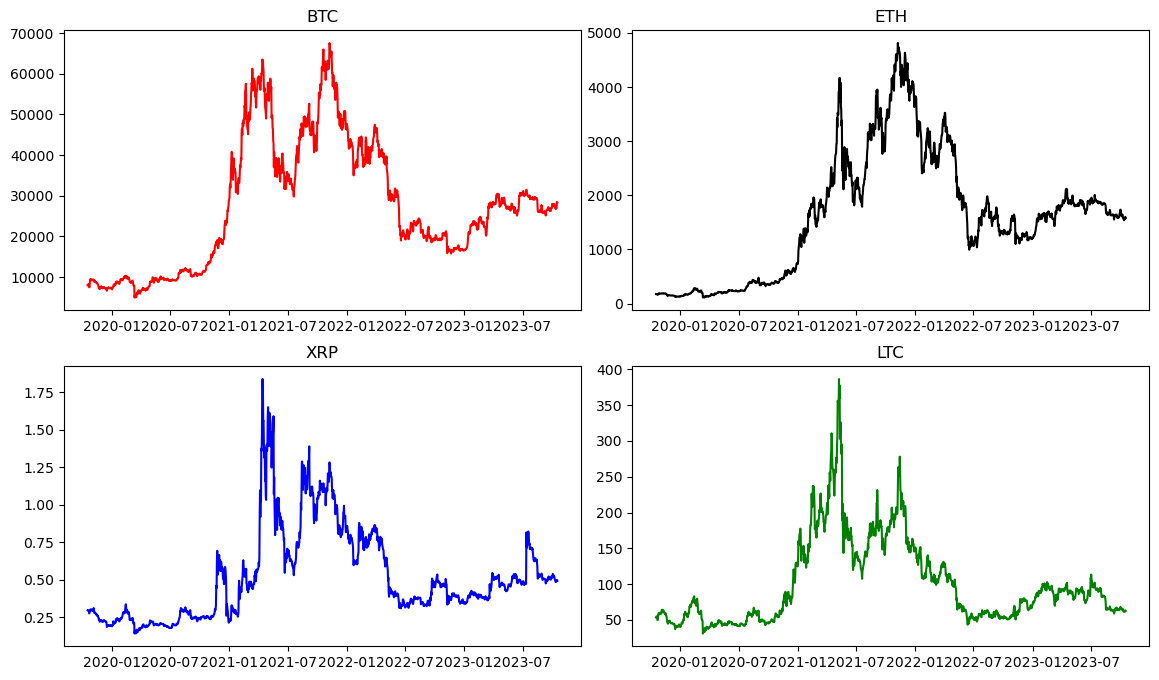

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(14,8), gridspec_kw={'hspace': 0.2, 'wspace':0.1})
axs[0,0].plot(df['BTC-USD'], c='r')
axs[0,0].set_title('BTC')

axs[0,1].plot(df['ETH-USD'], c='k')
axs[0,1].set_title('ETH')

axs[1,0].plot(df['XRP-USD'], c='b')
axs[1,0].set_title('XRP')

axs[1,1].plot(df['LTC-USD'], c='g')
axs[1,1].set_title('LTC')

plt.show()

### Assessing the day-to-day price fluctuations for comparison.

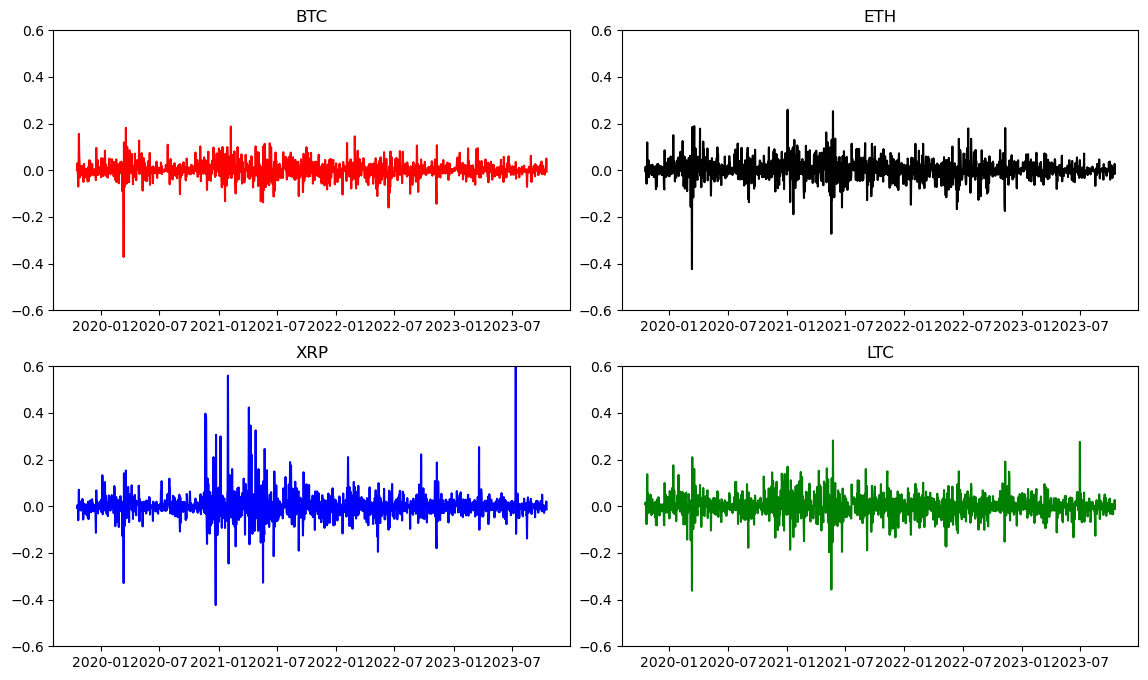

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(14,8), gridspec_kw={'hspace': 0.2, 'wspace':0.1})
axs[0,0].plot(daily_returns['BTC-USD'], c='r')
axs[0,0].set_title('BTC')
axs[0,0].set_ylim([-0.6, 0.6])

axs[0,1].plot(daily_returns['ETH-USD'], c='k')
axs[0,1].set_title('ETH')
axs[0,1].set_ylim([-0.6, 0.6])

axs[1,0].plot(daily_returns['XRP-USD'], c='b')
axs[1,0].set_title('XRP')
axs[1,0].set_ylim([-0.6, 0.6])

axs[1,1].plot(daily_returns['LTC-USD'], c='g')
axs[1,1].set_title('LTC')
axs[1,1].set_ylim([-0.6, 0.6])

plt.show()

### Analysis of return distributions.

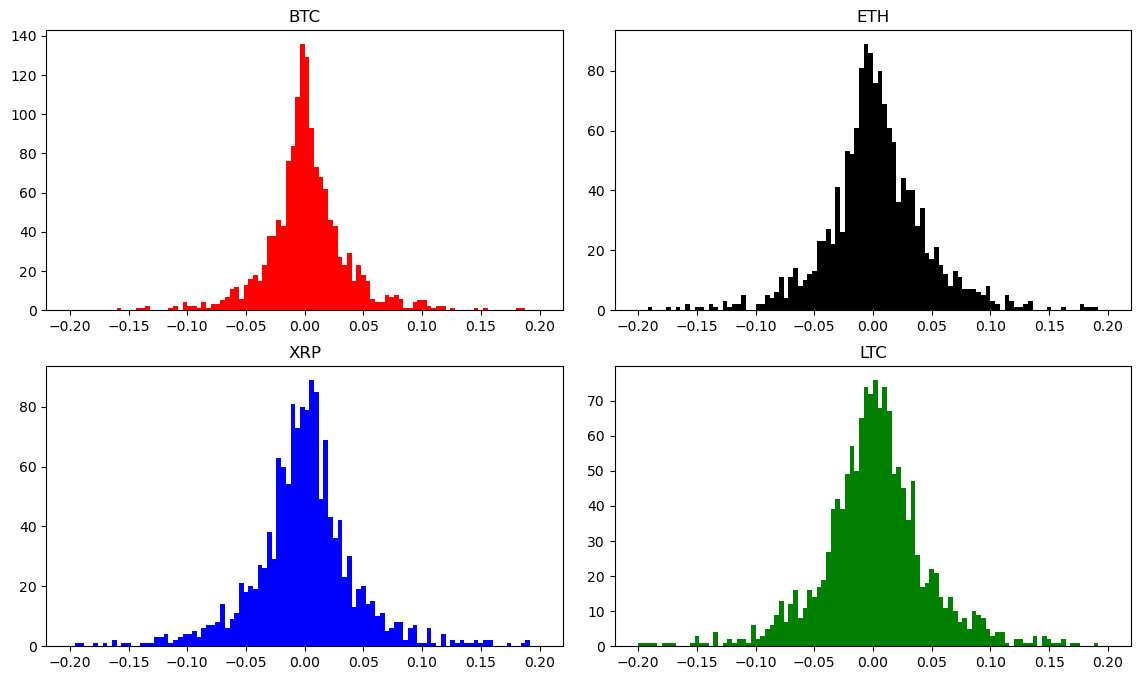

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(14,8), gridspec_kw={'hspace': 0.2, 'wspace':0.1})
axs[0,0].hist(daily_returns['BTC-USD'],bins=100, range=(-0.2,0.2), color='r')
axs[0,0].set_title('BTC')


axs[0,1].hist(daily_returns['ETH-USD'],bins=100, range=(-0.2,0.2), color='k')
axs[0,1].set_title('ETH')

axs[1,0].hist(daily_returns['XRP-USD'],bins=100, range=(-0.2,0.2), color='b')
axs[1,0].set_title('XRP')

axs[1,1].hist(daily_returns['LTC-USD'],bins=100, range=(-0.2,0.2), color='g')
axs[1,1].set_title('LTC')

plt.show()

### Exceptional returns - data points that stand out.

<function matplotlib.pyplot.show(close=None, block=None)>

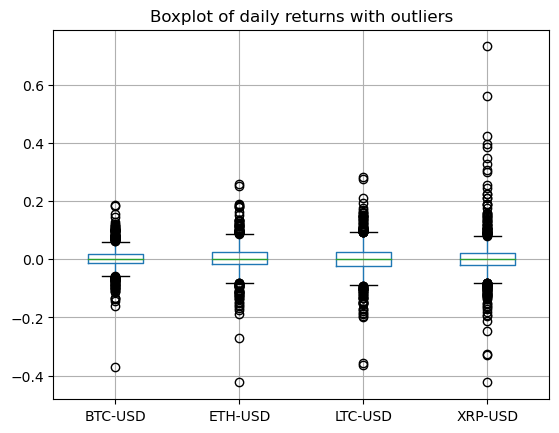

In [11]:
daily_returns.boxplot()
plt.title('Boxplot of daily returns with outliers')
plt.show


### Excluding exceptional data points.

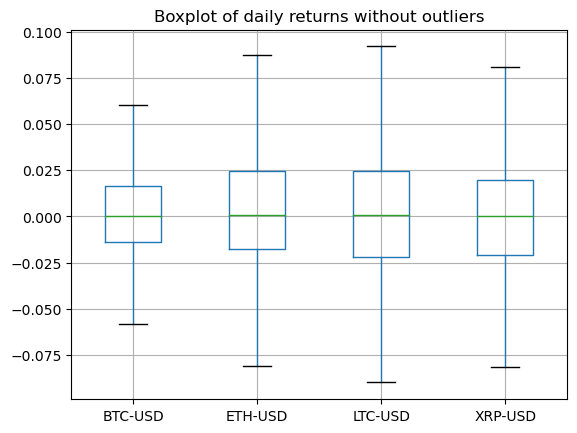

In [12]:
daily_returns.boxplot(showfliers=False)
plt.title('Boxplot of daily returns without outliers')
plt.show()

### Correlations of crypto returns

In [13]:
daily_returns.corr()

,BTC-USD,ETH-USD,LTC-USD,XRP-USD
BTC-USD,1.000000,0.823960,0.787937,0.558017
ETH-USD,0.823960,1.000000,0.809364,0.598012
LTC-USD,0.787937,0.809364,1.000000,0.613841
XRP-USD,0.558017,0.598012,0.613841,1.000000


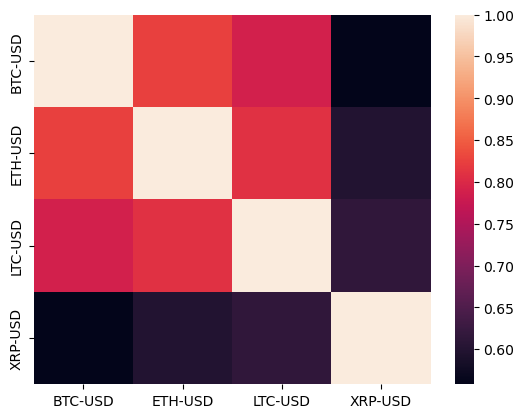

In [14]:
sns.heatmap(daily_returns.corr())
plt.show()

This information is provided for general informational and educational purposes only and should not be considered as financial advice. Always consult with a qualified financial professional before making any investment decisions.